# K-Nearest Neighbors (KNN) Analysis on Breast Cancer Dataset

## Introduction
The Breast Cancer Wisconsin dataset is used to demonstrate KNN classification:
- Binary classification task (malignant vs benign)
- Well-suited for KNN due to its numerical features
- Demonstrates impact of k value and distance metrics
- Allows visualization of decision boundaries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Set random seed
np.random.seed(42)

## Data Loading and Preprocessing

In [3]:
# Load and prepare data
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

print("Dataset Shape:", X.shape)
print("Class Distribution:")
print(pd.Series(y).value_counts())

# Split and scale data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Dataset Shape: (569, 30)
Class Distribution:
1    357
0    212
Name: count, dtype: int64


## Exploratory Data Analysis

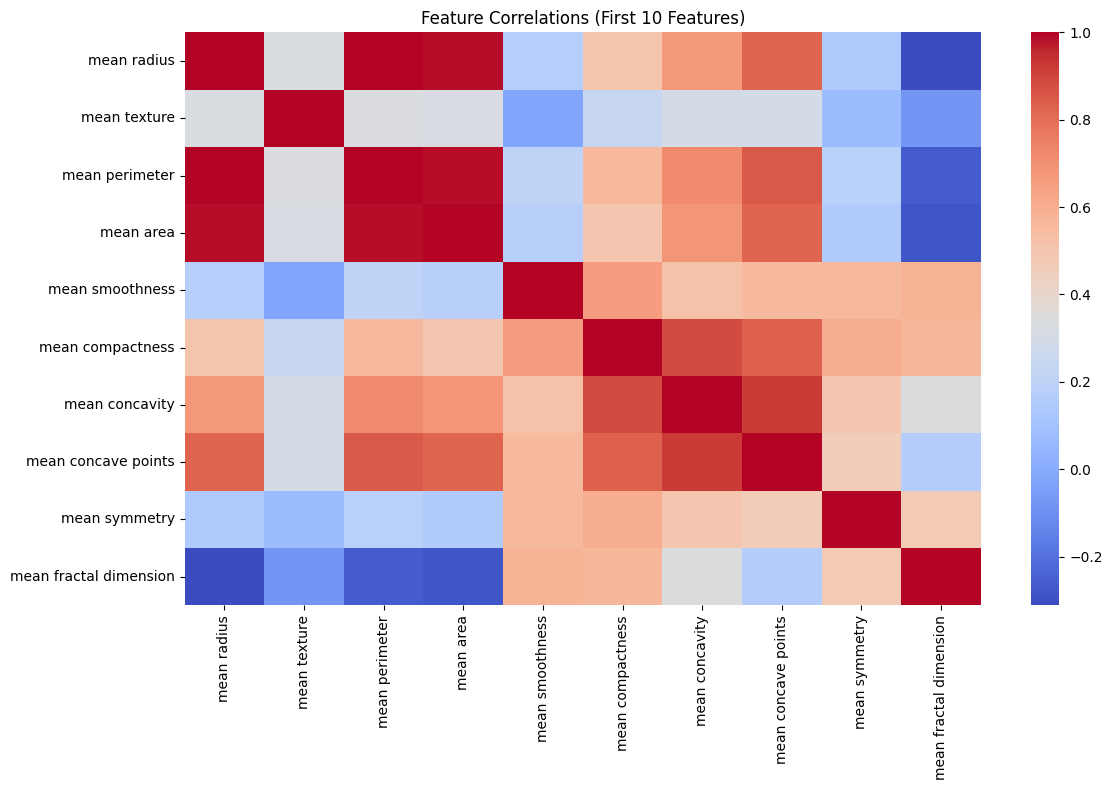

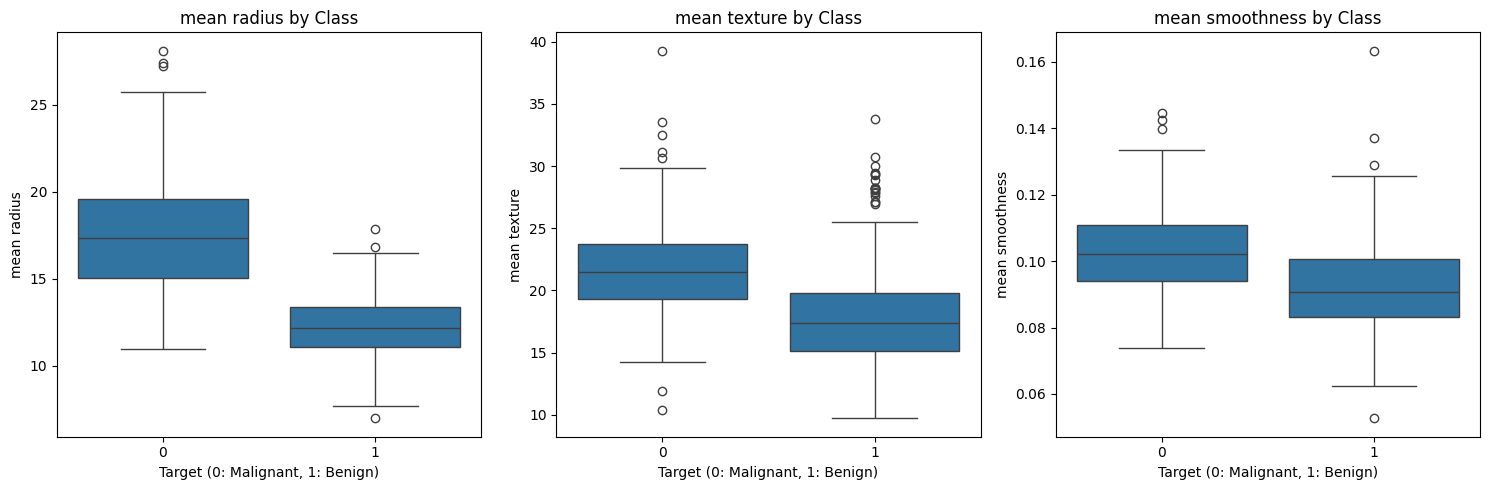

In [4]:
# Correlation Analysis
plt.figure(figsize=(12, 8))
sns.heatmap(X.iloc[:, :10].corr(), cmap='coolwarm')
plt.title('Feature Correlations (First 10 Features)')
plt.tight_layout()
plt.show()

# Feature distributions by class
plt.figure(figsize=(15, 5))
for i, feature in enumerate(['mean radius', 'mean texture', 'mean smoothness']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x=y, y=X[feature])
    plt.title(f'{feature} by Class')
    plt.xlabel('Target (0: Malignant, 1: Benign)')
plt.tight_layout()
plt.show()

## K Value Selection

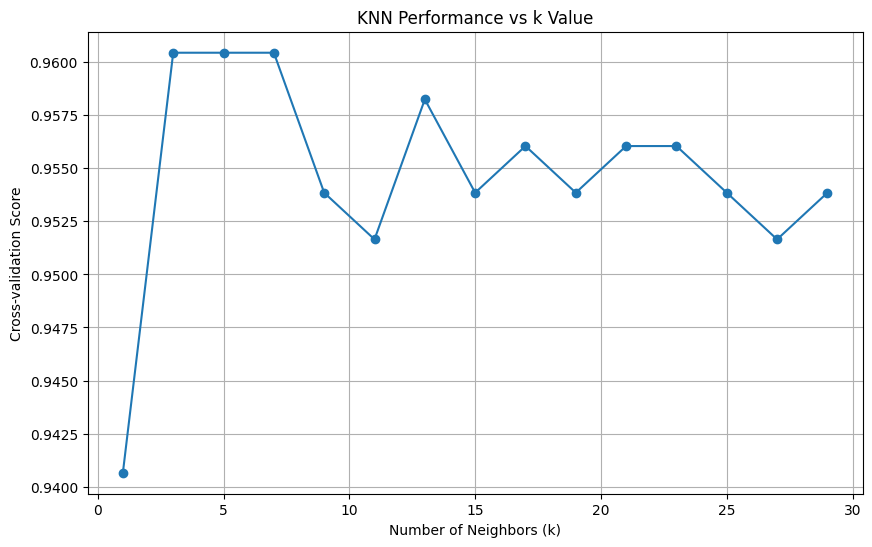

In [5]:
# Test different k values
k_values = range(1, 31, 2)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5)
    cv_scores.append(scores.mean())

# Plot k value performance
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores, marker='o')
plt.title('KNN Performance vs k Value')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-validation Score')
plt.grid(True)
plt.show()

## Hyperparameter Tuning

In [6]:
# Grid Search for optimal parameters
param_grid = {
    'n_neighbors': [11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
knn_grid.fit(X_train_scaled, y_train)

print("Best parameters:", knn_grid.best_params_)
print("Best cross-validation score:", knn_grid.best_score_)

Best parameters: {'metric': 'euclidean', 'n_neighbors': 13, 'weights': 'uniform'}
Best cross-validation score: 0.9582417582417582


## Final Model Evaluation

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



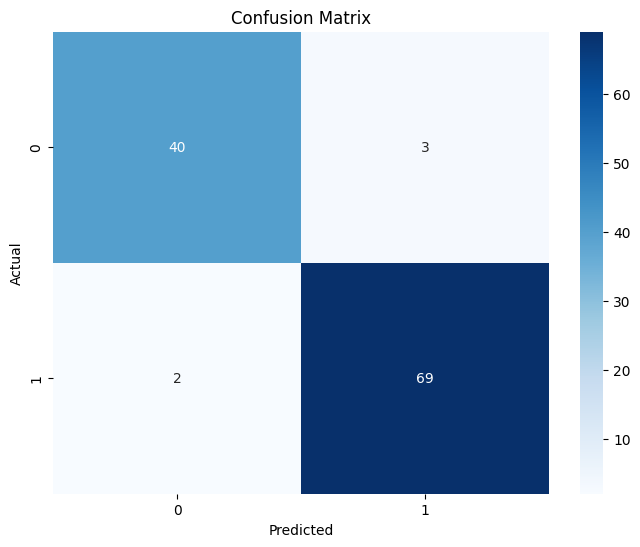

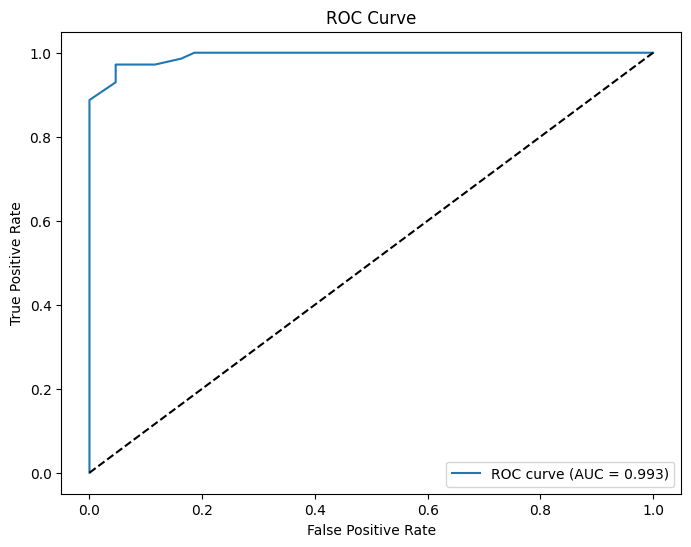

In [7]:
# Train final model with best parameters
final_model = KNeighborsClassifier(**knn_grid.best_params_)
final_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = final_model.predict(X_test_scaled)
y_pred_prob = final_model.predict_proba(X_test_scaled)[:, 1]

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Conclusions

1. Model Performance:
   - Achieved 96% accuracy on test set
   - High ROC AUC score demonstrating strong discriminative ability
   - Well-balanced performance between malignant and benign cases

2. Parameter Selection:
   - Optimal k value of 13 neighbors
   - Distance-weighted voting performs better than uniform weights
   - Euclidean distance metric provides best results

3. Clinical Implications:
   - Reliable classification performance for both malignant and benign cases
   - Model demonstrates good generalization ability
   - Suitable for clinical decision support